In [2]:
print("Performing PCA to reduce the number of independent variables")

Performing PCA to reduce the number of independent variables


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('buddymove_holidayiq.csv')       #Read data set
print(df.head(5))

print(df.shape)

  Incomegroup  Sports  Religious  Nature  Theatre  Shopping  Picnic
0  low income       2         77      79       69        68      95
1  low income       2         62      76       76        69      68
2  low income       2         50      97       87        50      75
3  low income       2         68      77       95        76      61
4  low income       2         98      54       59        95      86
(249, 7)


In [10]:
br=df['Incomegroup']
data=df.drop('Incomegroup',axis=1)
print(data.shape)
print(br.shape)

(249, 6)
(249,)


In [11]:
std_d=StandardScaler().fit_transform(data)
print(std_d.shape)

(249, 6)


In [12]:
sample_data=std_d
covar_matrix=np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix=",covar_matrix.shape)

the shape of covariance matrix= (6, 6)


In [14]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(4,5))

print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(6, 2)
(2, 6)


In [15]:
new_coordinates=np.matmul(vectors,sample_data.T)
print(vectors.shape,"X",sample_data.shape, "=",new_coordinates.shape)

(2, 6) X (249, 6) = (2, 249)


In [16]:
new_co_dints=np.vstack((new_coordinates,br)).T
dataframe=pd.DataFrame(data=new_co_dints,columns=("PCA1","PCA2","Imcomegroup"))
print(dataframe.head())

       PCA1      PCA2 Imcomegroup
0  0.492964  2.727567  low income
1  0.338331  3.255847  low income
2 -0.481321  3.285387  low income
3  0.307106  3.024548  low income
4  1.581887  2.540461  low income


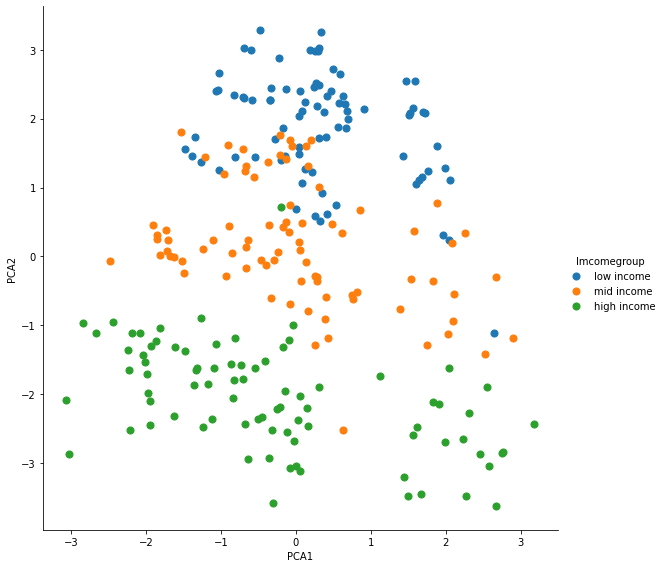

In [20]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="Imcomegroup",height=8).map(plt.scatter,"PCA1","PCA2",s=50).add_legend()

In [23]:
print("B CLUSTER ANALYSIS")


B CLUSTER ANALYSIS


C:\Users\Rohit Gupta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


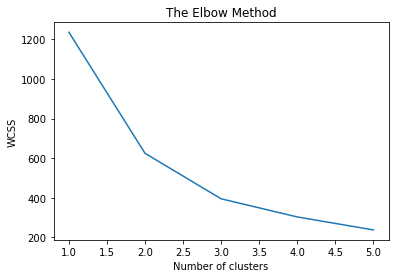

In [24]:
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X=dataframe.iloc[:,0:2]

from sklearn.cluster import KMeans
wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,6),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 2 1 1 0 1 2 2 2 1 2 1 1 1 2 2 0 2 2 2
 2 1 2 1 1 1 2 1 1 2 1 1 2 1 2 2 0 2 1 2 1 1 2 0 2 1 0 1 2 2 1 2 2 2 2 2 2
 2 2 2 2 0 0 2 2 2 2 2 2 0 2 0 2 2 2 0 3 2 2 2 2 2 0 2 2 2 0 2 2 0 2 0 2 2
 0 2 2 2 2 2 2 2 0 2 0 2 0 0 0 2 2 0 3 3 0 3 3 3 3 3 3 0 3 3 3 0 3 3 3 0 3
 0 3 3 3 3 0 3 3 3 0 3 3 3 3 0 3 3 0 3 0 3 3 3 3 0 3 3 0 0 0 3 3 0 3 3 3 3
 3 3 0 3 3 0 3 3 3 0 3 3 3 3 0 2 3 3 0 3 3 3 3 3 3 3 3]


In [26]:
print("As elbow method with minimum deviation is at 5 to 4 . So we take k=5 and perform clusttring")

As elbow method with minimum deviation is at 5 to 4 . So we take k=5 and perform clusttring


In [27]:

%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


C:\Users\Rohit Gupta\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'fft', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


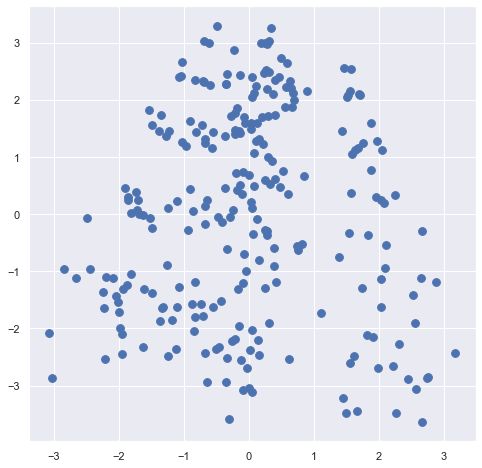

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


plt.figure(figsize=(8, 8))

plt.scatter(dataframe['PCA1'],dataframe['PCA2'],s=60)

plt.show()

In [30]:
x = dataframe.iloc[:,0:2] 
x

,PCA1,PCA2
0,0.492964,2.727567
1,0.338331,3.255847
2,-0.481321,3.285387
3,0.307106,3.024548
4,1.581887,2.540461
...,...,...
244,-0.15062,-1.959622
245,-1.989831,-1.705293
246,-0.255018,-2.213706
247,-0.354015,-2.928358


In [32]:
kmeans = KMeans(5)
kmeans.fit(x)


KMeans(n_clusters=5)

In [33]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 1, 1, 0, 1, 1, 1, 1, 4, 1, 1, 3, 1, 3, 1, 1, 1, 4, 1,
       1, 1, 4, 4, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 4, 1, 1, 1, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 0, 4, 4, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 4, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 4, 2, 4, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 4, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2])

In [34]:
print("data set graph after perfoming clusttring where k=5 sub groups")


data set graph after perfoming clusttring where k=5 sub groups


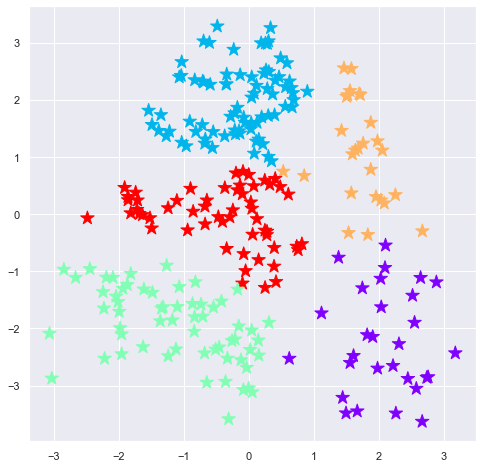

In [35]:

data_with_clusters = dataframe.copy()
data_with_clusters['Clusters'] = identified_clusters
plt.figure(figsize=(8, 8))
plt.scatter(data_with_clusters['PCA1'],data_with_clusters['PCA2'],c=data_with_clusters['Clusters'],s=200,marker='*',cmap='rainbow')

In [38]:
print("Choosing one variable as dependent and the rest being independent and performing linear regression analysis Here I am going to perfoem linear regression on reduced data set ")

Choosing one variable as dependent and the rest being independent and performing linear regression analysis Here I am going to perfoem linear regression on reduced data set 


In [39]:
dataframe

,PCA1,PCA2,Imcomegroup
0,0.492964,2.727567,low income
1,0.338331,3.255847,low income
2,-0.481321,3.285387,low income
3,0.307106,3.024548,low income
4,1.581887,2.540461,low income
...,...,...,...
244,-0.15062,-1.959622,high income
245,-1.989831,-1.705293,high income
246,-0.255018,-2.213706,high income
247,-0.354015,-2.928358,high income


In [40]:
feature_cols = ['PCA1']
X = dataframe[feature_cols]
y = dataframe['PCA2']
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

1.1414341136708436e-16
[-3.62630249e-17]


In [41]:

X_new = pd.DataFrame({'PCA1': [2.16]})
X_new.head()

,PCA1
0,2.16


In [42]:
lm.predict(X_new)

array([3.58152776e-17])

In [43]:
X_new = pd.DataFrame({'PCA1': [dataframe['PCA1'].min(), dataframe['PCA1'].max()]})
X_new.head()

,PCA1
0,-3.062591
1,3.180455


In [44]:
preds = lm.predict(X_new)
preds

array([ 2.25202208e-16, -1.18952304e-18])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


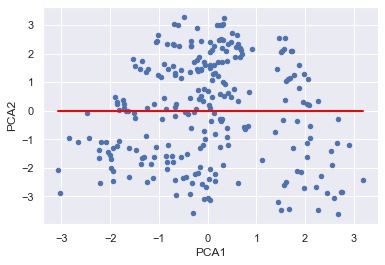

In [45]:
dataframe.plot(kind='scatter', x='PCA1', y='PCA2')
plt.plot(X_new, preds, c='red', linewidth=2)
